### Helper Methods for getting data

- The functions are described in their corresponding docstring 
- Each serving a different purpose to get or extract different types of data

In [2]:
from time import sleep
import pandas as pd
import numpy as np
import jikanpy as jikan
import json as json

jikan = jikan.Jikan()

def get_anime_data(anime_id):
    anime = jikan.anime(anime_id)
    df = pd.DataFrame.from_dict(anime)
    return df

def get_top_manga():
    top_manga = jikan.top(type="manga")
    return top_manga

def get_top_anime():
    """
    Gets the top current anime from the Jikan API / MAL Database

    Returns:
    top_anime: Dict containting the top anime from the first page (25 entries)
    """    ''''''
    top_anime = jikan.top(type="anime")
    return top_anime

def extract_top_anime_names(top_anime):
    '''
    Extracts the names of the top anime from the top anime data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime names
    '''
    df = pd.DataFrame(top_anime["data"])["title_english"]
    return df

def extract_top_manga_names(top_manga):
    '''
    Extracts the names of the top manga from the top manga data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime names
    '''
    df = pd.DataFrame(top_manga["data"])["title"]
    return df

def extract_top_manga_scoring(top_manga):
    '''
    Extracts the names of the top manga from the top manga data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime names
    '''
    df = pd.DataFrame(top_manga["data"])["score"]
    return df

def extract_top_anime_scoring(top_anime):
    '''
    Extracts the scores of the top anime from the top anime data
    
    Parameters:
    top_anime: dict
    
    Returns:
    df: DataFrame with anime scores
    '''
    df = pd.DataFrame(top_anime["data"])["score"]
    return df

def return_top_anime_top_manga_with_score(amount=10):
    '''
    Returns a DataFrame with the top anime and manga with their respective scores
    
    Parameters:
    amount: int, default 10
    
    Returns:
    df: DataFrame with top anime and manga with scores
    '''
    top_anime = get_top_anime()
    top_manga = get_top_manga()
    df = pd.DataFrame()
    top_anime_names = extract_top_anime_names(top_anime)[0:amount]
    top_anime_scores = extract_top_anime_scoring(top_anime)[0:amount]
    top_manga_names = extract_top_manga_names(top_manga)[0:amount]
    top_manga_scores = extract_top_manga_scoring(top_manga)[0:amount]
    df = pd.concat([top_anime_names, top_anime_scores, top_manga_names, top_manga_scores], axis=1)
    df.columns = ["Top Anime", "Top Anime Score", "Top Manga", "Top Manga Score"]
    return df

def get_review_texts(anime_id, num_pages=5):
    '''
    Gets the review texts for a given anime id
    
    Parameters:
    anime_id: int
    num_pages: int, default 5 pages
    
    Returns:
    df: DataFrame with review texts
    '''
    df = pd.DataFrame()
    for i in range(1, num_pages):
        review = jikan.anime(anime_id, extension="reviews", page=i)
        if(review["data"] == []):
            break  # data equals empty list if there are no more reviews
        else:
            sleep(2)  # to prevent rate limiting
        new_data = pd.DataFrame.from_dict(review["data"])["review"]
        df = pd.concat([df, new_data], ignore_index=True)
    return df

#### Getting the top 10 Anime and Manga with score

In [2]:
df_top_animanga = return_top_anime_top_manga_with_score(10)
df_top_animanga

,Top Anime,Top Anime Score,Top Manga,Top Manga Score
0,Frieren: Beyond Journey's End,9.36,Berserk,9.47
1,Fullmetal Alchemist: Brotherhood,9.09,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.31
2,Steins;Gate,9.07,Vagabond,9.25
3,Gintama Season 4,9.06,One Piece,9.22
4,Attack on Titan Season 3 Part 2,9.05,Monster,9.16
5,Gintama: The Very Final,9.04,Tian Guan Cifu,9.10
6,Gintama Season 2,9.03,Slam Dunk,9.08
7,Hunter x Hunter,9.03,Vinland Saga,9.07
8,Gintama: Enchousen,9.02,Fullmetal Alchemist,9.04
9,Legend of the Galactic Heroes,9.02,Omniscient Reader's Viewpoint,9.03


In [3]:
anime = get_top_anime()
manga = get_top_manga()
df =  pd.DataFrame(anime["data"])["title_english"]
df = pd.DataFrame(df[0:10], columns=["title_english"])
df["Scores"] = pd.DataFrame(anime["data"])["score"]
df.rename(columns={"title_english": "Anime"}, inplace=True)
print("Top 10 Anime")
print(df)

count_Gintama = pd.DataFrame(anime["data"])["title_english"].str.contains("Gintama").sum()
count_top_anime = pd.DataFrame(anime["data"])["title_english"].count()
print("Amount of Gintama in the top anime list: " + str(count_Gintama) + " with a total of " + str(count_top_anime) + " anime in the list.")



Top 10 Anime
                              Anime  Scores
0     Frieren: Beyond Journey's End    9.36
1  Fullmetal Alchemist: Brotherhood    9.09
2                       Steins;Gate    9.07
3                  Gintama Season 4    9.06
4   Attack on Titan Season 3 Part 2    9.05
5           Gintama: The Very Final    9.04
6                  Gintama Season 2    9.03
7                   Hunter x Hunter    9.03
8                Gintama: Enchousen    9.02
9     Legend of the Galactic Heroes    9.02
Amount of Gintama in the top anime list: 8 with a total of 25 anime in the list.


In [5]:
seasons = jikan.seasons(extension="now")
seasons

dataframe = pd.DataFrame(seasons["data"])
dataframe["title_english"]

0                                             One Piece
1     KonoSuba: God's Blessing on This Wonderful Wor...
2     Demon Slayer: Kimetsu no Yaiba Hashira Trainin...
3                                           Case Closed
4     Mushoku Tensei: Jobless Reincarnation Season 2...
5                                           Kaiju No. 8
6      That Time I Got Reincarnated as a Slime Season 3
7                             My Hero Academia Season 7
8                  Tsukimichi: Moonlit Fantasy Season 2
9                                                  None
10         Spice and Wolf: Merchant Meets the Wise Wolf
11           The Misfit of Demon King Academy II Part 2
12    I Was Reincarnated as the 7th Prince so I Can ...
13    An Archdemon's Dilemma: How to Love Your Elf B...
14                                Go! Go! Loser Ranger!
15    Chillin' in Another World with Level 2 Super C...
16          The Irregular at Magic High School Season 3
17                                              

In [47]:
df = get_review_texts(5114)
df
# mal_ids = df["data"][0]["mal_id"]
# mal_ids

0     First of all, I have seen the original FMA and...
1     Fullmetal Alchemist: Brotherhood gets an immen...
2     Adaptations have long been a thorn in the side...
3     Since I couldn't find any legitimate objective...
4     *Spoiler Warning Aside from the usual everyday...
5     I can't even watch the original FMA anime now ...
6     Now, this is a prime example of how to adapt a...
7     "We're not gods, we're only human. We can't ev...
8     If one wishes to obtain something, something o...
9     Full metal alchemist brotherhood the anime tha...
10    One of my favorite anime of all time! I was on...
11    I have followed both the anime and manga of FM...
12    Ah, Fullmetal Alchemist, what an amazing ride ...
13    I was dreading having to make my way through B...
14    I'm going to be completely honest here... this...
15    There isn't much more I could say with all the...
16    This anime is going in the All Time Favourites...
17    Story: Well this story is nothing short of

In [68]:
from time import sleep


# review = jikan.anime(5114, extension="reviews", page=500)
# if(review["data"] == []):
#     print("No reviews")

df = pd.DataFrame()

for i in range(1, 3):
    review = jikan.anime(5114, extension="reviews", page=i)
    if(review["data"] == []):
        break 
    else:
        sleep(1)
    new_data = pd.DataFrame.from_dict(review["data"])["review"]
    df = pd.concat([df, new_data], ignore_index=True)

df

,0
0,"First of all, I have seen the original FMA and..."
1,Fullmetal Alchemist: Brotherhood gets an immen...
2,Adaptations have long been a thorn in the side...
3,Since I couldn't find any legitimate objective...
4,*Spoiler Warning Aside from the usual everyday...
5,I can't even watch the original FMA anime now ...
6,"Now, this is a prime example of how to adapt a..."
7,"""We're not gods, we're only human. We can't ev..."
8,"If one wishes to obtain something, something o..."
9,Full metal alchemist brotherhood the anime tha...


In [76]:
df = get_review_texts(5114, 3)
df

,0
0,"First of all, I have seen the original FMA and..."
1,Fullmetal Alchemist: Brotherhood gets an immen...
2,Adaptations have long been a thorn in the side...
3,Since I couldn't find any legitimate objective...
4,*Spoiler Warning Aside from the usual everyday...
5,I can't even watch the original FMA anime now ...
6,"Now, this is a prime example of how to adapt a..."
7,"""We're not gods, we're only human. We can't ev..."
8,"If one wishes to obtain something, something o..."
9,Full metal alchemist brotherhood the anime tha...


In [78]:
top_anime = get_top_anime()
top_anime_names = extract_top_anime_names(top_anime)
top_anime_names

0                         Frieren: Beyond Journey's End
1                      Fullmetal Alchemist: Brotherhood
2                                           Steins;Gate
3                                      Gintama Season 4
4                       Attack on Titan Season 3 Part 2
5                               Gintama: The Very Final
6                                      Gintama Season 2
7                                       Hunter x Hunter
8                                    Gintama: Enchousen
9                         Legend of the Galactic Heroes
10            Kaguya-sama: Love is War - Ultra Romantic
11                      Bleach: Thousand-Year Blood War
12                                     Gintama Season 5
13                      Fruits Basket: The Final Season
14                                              Gintama
15                                 Clannad: After Story
16                                       A Silent Voice
17                March Comes In Like a Lion 2nd

In [39]:
s = jikan.manga(1706)
s["data"]["titles"]

[{'type': 'Default',
  'title': 'JoJo no Kimyou na Bouken Part 7: Steel Ball Run'},
 {'type': 'Synonym',
  'title': "JoJo's Bizarre Adventure Part 7: Steel Ball Run"},
 {'type': 'Synonym', 'title': 'SBR'},
 {'type': 'Japanese', 'title': 'ジョジョの奇妙な冒険 Part7 STEEL BALL RUN'},
 {'type': 'French', 'title': 'Steel Ball Run'}]

In [6]:
count = 0
for i in range(0, len(df)):
    if df[i] is not None and "gintama" in df[i].lower():
        count += 1
    else:
        continue
print(count)

KeyError: 0

In [15]:
df = pd.DataFrame(jikan.top(type="anime", parameters={"filter": "bypopularity"})["data"][0:10])
df["title"]

0                  Shingeki no Kyojin
1                          Death Note
2    Fullmetal Alchemist: Brotherhood
3                       One Punch Man
4                    Sword Art Online
5                    Kimetsu no Yaiba
6               Boku no Hero Academia
7                              Naruto
8              Hunter x Hunter (2011)
9                         Tokyo Ghoul
Name: title, dtype: object

In [53]:
s = jikan.top(type="anime")["data"]
sd = pd.DataFrame(s)
d = sd["demographics"]
list = []
for i in range(0, len(d)-1):
    for item in d[i]:
        list.append(item['name'])

df = pd.DataFrame(list)

        
        

0    19
dtype: int64

['Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Shounen', 'Seinen', 'Shounen', 'Shounen', 'Shoujo', 'Shounen', 'Shounen', 'Seinen', 'Shounen', 'Shounen', 'Shounen', 'Seinen']


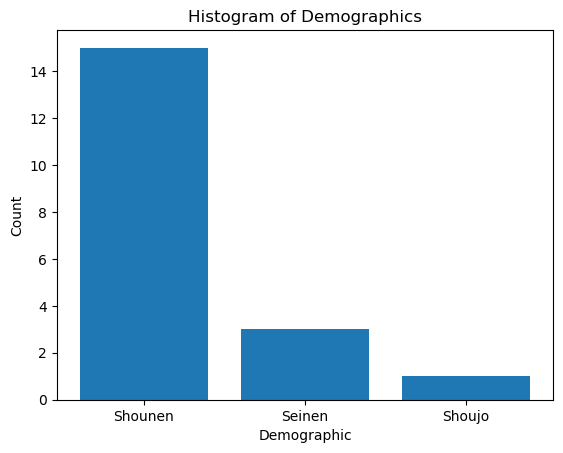

In [63]:
import matplotlib.pyplot as plt
from collections import Counter

s = jikan.top(type="anime")["data"]
sd = pd.DataFrame(s)
d = sd["demographics"]
l = [x["name"] for dicts in d for x in dicts]
# for i in range(0, len(d) - 1):
#     for item in d[i]:
#         list.append(item["name"])

print(l)
counts = Counter(l)

# Create a DataFrame from the counts
df = pd.DataFrame.from_dict(counts, orient="index").reset_index()
df = df.rename(columns={"index": "demographic", 0: "count"})

# Plot the histogram
plt.bar(df["demographic"], df["count"])
plt.xlabel("Demographic")
plt.ylabel("Count")
plt.title("Histogram of Demographics")
plt.show()

In [81]:
def get_top_popular_demographics():
    num_pages = 3
    demographic_names_popular = []
    demographic_names_top = []
    for i in range(1, num_pages):
        top_anime = pd.DataFrame(jikan.top(type="anime", page=i)["data"])
        sleep(2)  # to prevent rate limiting
        popular_anime = pd.DataFrame(jikan.top(type="anime", parameters={"filter": "bypopularity"}, page=i)["data"])
        
        top_anime_demographics = top_anime["demographics"]  # getting demographics dicts, which are in a list
        popular_anime_demographics = popular_anime["demographics"]
        
        demographic_names_top = demographic_names_top + [x["name"] for item in top_anime_demographics for x in item]  # extracting list item, then extracting name from dict
        demographic_names_popular = demographic_names_popular + [x["name"] for item in popular_anime_demographics for x in item]
        
    return Counter(demographic_names_top), Counter(demographic_names_popular)

In [82]:
d, s = get_top_popular_demographics()

In [85]:
print(d)
print(s)

Counter({'Shounen': 24, 'Seinen': 9, 'Shoujo': 1})
Counter({'Shounen': 28, 'Seinen': 5})


In [21]:
from collections import Counter

fmb = get_anime_data(5114)
gs = pd.DataFrame(fmb["data"]["genres"])
c = Counter(gs["name"])
c

Counter({'Action': 1, 'Adventure': 1, 'Drama': 1, 'Fantasy': 1})

In [22]:
def get_top_popular_genres():
    num_pages = 10
    genre_names_popular = []
    genre_names_top = []
    for i in range(1, num_pages):
        top_anime = pd.DataFrame(jikan.top(type="anime", page=i)["data"])
        sleep(2)  # to prevent rate limiting
        popular_anime = pd.DataFrame(
            jikan.top(type="anime", parameters={"filter": "bypopularity"}, page=i)[
                "data"
            ]
        )

        top_anime_genres = top_anime[
            "genres"
        ]  # getting genres dicts, which are in a list
        popular_anime_genres = popular_anime["genres"]

        genre_names_top = genre_names_top + [
            x["name"] for item in top_anime_genres for x in item
        ]  # extracting list item, then extracting name from dict
        genre_names_popular = genre_names_popular + [
            x["name"] for item in popular_anime_genres for x in item
        ]
    return Counter(genre_names_top)

In [23]:
ss = get_top_popular_genres()

In [24]:
ss

Counter({'Action': 99,
         'Drama': 87,
         'Fantasy': 59,
         'Comedy': 52,
         'Supernatural': 52,
         'Adventure': 51,
         'Mystery': 41,
         'Sci-Fi': 40,
         'Suspense': 32,
         'Award Winning': 26,
         'Romance': 23,
         'Slice of Life': 19,
         'Sports': 18,
         'Ecchi': 3,
         'Horror': 3,
         'Avant Garde': 2,
         'Gourmet': 1})

In [26]:
top_anime = pd.DataFrame(jikan.top(type="anime", page=1)["data"])

In [27]:
top_anime["genres"]

0     [{'mal_id': 2, 'type': 'anime', 'name': 'Adven...
1     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
2     [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
3     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
4     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
5     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
6     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
7     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
8     [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
9     [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
10    [{'mal_id': 4, 'type': 'anime', 'name': 'Comed...
11    [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
12    [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
13    [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
14    [{'mal_id': 1, 'type': 'anime', 'name': 'Actio...
15    [{'mal_id': 8, 'type': 'anime', 'name': 'Drama...
16    [{'mal_id': 46, 'type': 'anime', 'name': 'Awar...
17    [{'mal_id': 8, 'type': 'anime', 'name': 'D

In [28]:
genre_names_top = []
genre_names_top = genre_names_top + [
    x["name"] for item in top_anime["genres"] for x in item
]

In [29]:
genre_names_top

['Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Fantasy',
 'Drama',
 'Sci-Fi',
 'Suspense',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Action',
 'Drama',
 'Suspense',
 'Action',
 'Comedy',
 'Drama',
 'Sci-Fi',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Sci-Fi',
 'Comedy',
 'Romance',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Supernatural',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Supernatural',
 'Award Winning',
 'Drama',
 'Drama',
 'Action',
 'Award Winning',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Action',
 'Drama',
 'Suspense',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Suspense',
 'Comedy',
 'Mystery',
 'Supernatural']